<a href="https://colab.research.google.com/github/DenisCoutinho/Auto_MPG_RNA/blob/main/Auto_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

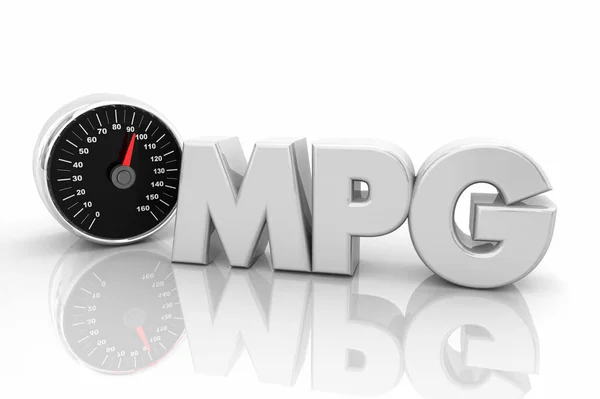

# Preâmbulo

In [58]:
# Importaremos as bibliotecas básicas
import pandas as pd
import numpy as np

In [59]:
# Geração de gráficos
import matplotlib.pyplot as plt

In [60]:
# Bibliotecas específicas para o aprendizado de máquina
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor 
from sklearn.neural_network import MLPRegressor

# Carregamento do Dataset

In [61]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DenisCoutinho/Auto_MPG_RNA/bc2311bec122b820bfbc3db72694f1e6837a5d03/auto-mpg.csv")

In [62]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Text(0.5, 1.0, 'Relação entre peso e autonomia dos veículos')

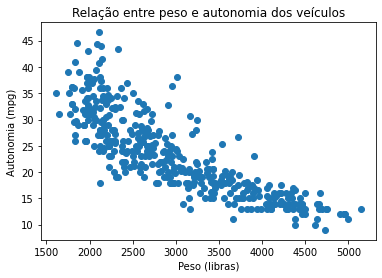

In [63]:
plt.scatter(dataset[["weight"]], dataset[["mpg"]])
plt.xlabel("Peso (libras)")
plt.ylabel("Autonomia (mpg)")
plt.title("Relação entre peso e autonomia dos veículos")

# Pré-processamento

In [64]:
X = dataset[["weight"]]
Y = dataset[["mpg"]]

In [65]:
# Conversão de Libras para Quilo e Milhas por galão para Quilômetros por litro
X["weight"] = X["weight"] * 0.453592
Y["mpg"] = Y["mpg"] * 0.425144

<ipython-input-65-445a3cd2ab15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["weight"] = X["weight"] * 0.453592
<ipython-input-65-445a3cd2ab15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["mpg"] = Y["mpg"] * 0.425144


In [66]:
X

,weight
0,1589.386368
1,1675.115256
2,1558.542112
3,1557.181336
4,1564.438808
...,...
393,1265.521680
394,966.150960
395,1040.993640
396,1190.679000


In [67]:
X.describe()

,weight
count,398.000000
mean,1347.360846
std,384.120654
min,731.643896
25%,1008.675210
50%,1271.645172
75%,1636.559936
max,2331.462880


In [68]:
# Normalização
escala = StandardScaler()
escala.fit(X)

X_norm = escala.transform(X)

In [69]:
# Dividindo em conjunto de treinamento e teste
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3)

# Processamento

In [70]:
rna = MLPRegressor(hidden_layer_sizes=(10, 5), 
                   max_iter=2000,
                   tol=0.0000001,
                   learning_rate_init=0.1,
                   solver="sgd",
                   activation="logistic",
                   learning_rate="constant",
                   verbose=2)

In [71]:
rna.fit(X_norm_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 44.15331026
Iteration 2, loss = 8.35097097
Iteration 3, loss = 6.23678750
Iteration 4, loss = 4.99743409
Iteration 5, loss = 4.69624831
Iteration 6, loss = 4.07681740
Iteration 7, loss = 3.22569163
Iteration 8, loss = 2.45602765
Iteration 9, loss = 1.92685983
Iteration 10, loss = 1.68611194
Iteration 11, loss = 1.61726949
Iteration 12, loss = 1.62174331
Iteration 13, loss = 1.67501161
Iteration 14, loss = 1.69360735
Iteration 15, loss = 1.68951827
Iteration 16, loss = 1.65582576
Iteration 17, loss = 1.64644486
Iteration 18, loss = 1.65481757
Iteration 19, loss = 1.65061193
Iteration 20, loss = 1.65292830
Iteration 21, loss = 1.63421172
Iteration 22, loss = 1.60545060
Iteration 23, loss = 1.59042141
Iteration 24, loss = 1.56426131
Iteration 25, loss = 1.54836775
Iteration 26, loss = 1.54105094
Iteration 27, loss = 1.51124375
Iteration 28, loss = 1.50101560
Iteration 29, loss = 1.48497784
Iteration 30, loss = 1.47289515
Iteration 31, loss = 1.45604919
Iteration 32, lo

MLPRegressor(activation='logistic', hidden_layer_sizes=(10, 5),
             learning_rate_init=0.1, max_iter=2000, solver='sgd', tol=1e-07,
             verbose=2)

In [72]:
reglinear = SGDRegressor(max_iter=2000,
                         tol=0.0000001,
                         eta0=0.1,
                         learning_rate="constant",
                         verbose=2)

In [73]:
reglinear.fit(X_norm_train,Y_train)

-- Epoch 1
Norm: 2.23, NNZs: 1, Bias: 9.564140, T: 278, Avg. loss: 2.858412
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.03, NNZs: 1, Bias: 9.977831, T: 556, Avg. loss: 1.589190
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.26, NNZs: 1, Bias: 10.310603, T: 834, Avg. loss: 1.587056
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.77, NNZs: 1, Bias: 10.191730, T: 1112, Avg. loss: 1.583901
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.83, NNZs: 1, Bias: 9.803734, T: 1390, Avg. loss: 1.661251
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.02, NNZs: 1, Bias: 10.076852, T: 1668, Avg. loss: 1.660579
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.73, NNZs: 1, Bias: 10.470614, T: 1946, Avg. loss: 1.649663
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 3.58, NNZs: 1, Bias: 10.551859, T: 2224, Avg. loss: 1.621880
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.84, NNZs: 1, Bias: 10.538244, T: 2502, Avg. loss: 1.667712
Total training time: 0.0

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, learning_rate='constant', max_iter=2000, tol=1e-07,
             verbose=2)

# Pós-processamento

In [74]:
# Previsão do conjunto de teste
Y_rna_previsao = rna.predict(X_norm_test)
Y_rl_previsao = reglinear.predict(X_norm_test)

In [75]:
# Calcula o R²
r2_rna = r2_score(Y_test, Y_rna_previsao)
r2_rl = r2_score(Y_test, Y_rl_previsao)

print("R2 RNA:", r2_rna)
print("R2 RL:", r2_rl)

R2 RNA: 0.6122465476051753
R2 RL: 0.5711558014235285


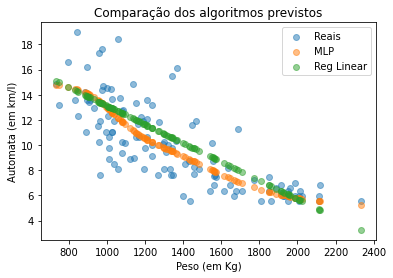

In [76]:
X_test = escala.inverse_transform(X_norm_test)

plt.scatter(X_test, Y_test, alpha=0.5, label="Reais")
plt.scatter(X_test, Y_rna_previsao, alpha=0.5, label="MLP")
plt.scatter(X_test, Y_rl_previsao, alpha=0.5, label="Reg Linear")
plt.xlabel("Peso (em Kg)")
plt.ylabel("Automata (em km/l)")
plt.title("Comparação dos algoritmos previstos")
plt.legend(loc=1)

In [77]:
# Prever para um novo dado

X_futuro = np.array([[1250]])
X_futuro_norm = escala.transform(X_futuro.T)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [78]:
y_rna_prev_futuro = rna.predict(X_futuro_norm)
y_reglinear_prev_futuro = reglinear.predict(X_futuro_norm)

In [80]:
print("RNA:", y_rna_prev_futuro)
print("Reg Linear:", y_reglinear_prev_futuro)

RNA: [10.13527309]
Reg Linear: [11.25835826]


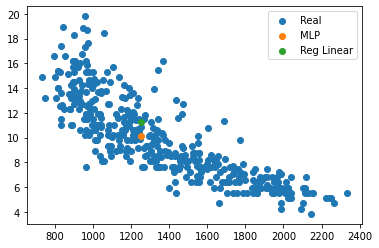

In [83]:
plt.scatter(X, Y, label="Real")
plt.scatter(X_futuro, y_rna_prev_futuro, label="MLP")
plt.scatter(X_futuro, y_reglinear_prev_futuro, label="Reg Linear")
plt.legend(loc=1)